In [5]:
import os
DIR = os.path.abspath('')
DATA = os.path.join(DIR, '../Data')
PLOTS = os.path.join(DIR, '../Plots')

sns.set_style('whitegrid')

def to_rad(data):
    data['alpha[rad]'] = np.radians(data['alpha[deg]'])
    
def plot(data1, data2, name, titles=['Mit Farbfilter', 'Ohne Farbfilter']):
    fig, ax = plt.subplots(1,2, subplot_kw={'polar':True})
    ax[0].plot(data1['alpha[rad]'], data1['U[V]'], 'g-', data1['alpha[rad]']+np.pi, data1['U[V]'], 'g--', label='')
    ax[1].plot(data2['alpha[rad]'], data2['U[V]'], 'g-', data2['alpha[rad]']+np.pi, data2['U[V]'], 'g--')
    ax[0].set_title(titles[0], pad=15)
    ax[1].set_title(titles[1], pad=15)
    ax[0].set_yticks([0.05, 0.15, 0.25])
    ax[1].set_yticks([0.05, 0.15, 0.25])
    return ax

Lineare Polarisation

In [6]:
data = pd.read_csv(os.path.join(DATA, 'aufg1_linear.csv'), comment='#')
data_ohne = pd.read_csv(os.path.join(DATA, 'aufg1_linear_ohne.csv'), comment='#')
to_rad(data)
to_rad(data_ohne)
data.head()

,alpha[deg],U[V],alpha[rad]
0,0,1.18,0.000000
1,5,1.54,0.087266
2,10,1.87,0.174533
3,15,2.22,0.261799
4,20,2.53,0.349066


array([<matplotlib.axes._subplots.PolarAxesSubplot object at 0x1a16368590>,
      dtype=object)

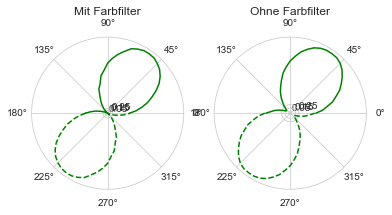

In [7]:
plot(data, data_ohne, 'aufg1_linear.png')

Aufgabe 2. Der 1. Polfilter war nicht auf 0 deg, deswegen ist der plot gedreht.

In [8]:
data = pd.read_csv(os.path.join(DATA, 'aufg1_circ.csv'), comment='#')
data_ohne = pd.read_csv(os.path.join(DATA, 'aufg1_circ_ohne.csv'), comment='#')
to_rad(data)
to_rad(data_ohne)
data.head()

,alpha[deg],U[V],alpha[rad]
0,0,0.884,0.000000
1,5,0.939,0.087266
2,10,0.986,0.174533
3,15,1.035,0.261799
4,20,1.086,0.349066


array([<matplotlib.axes._subplots.PolarAxesSubplot object at 0x1a1848aad0>,
      dtype=object)

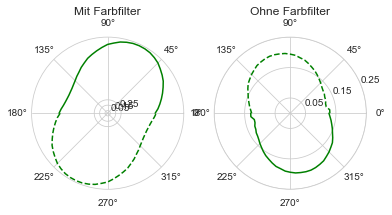

In [9]:
plot(data, data_ohne, 'aufg1_circular.png')

aufg1 Elliptisch

In [10]:
data = pd.read_csv(os.path.join(DATA, 'aufg1_ellip.csv'), comment='#')
data_2 = pd.read_csv(os.path.join(DATA, 'aufg1_ellip_2.csv'), comment='#')
to_rad(data)
to_rad(data_2)
data.head()

,alpha[deg],U[V],alpha[rad]
0,0,0.0413,0.000000
1,5,0.0297,0.087266
2,10,0.0220,0.174533
3,15,0.0171,0.261799
4,20,0.0171,0.349066


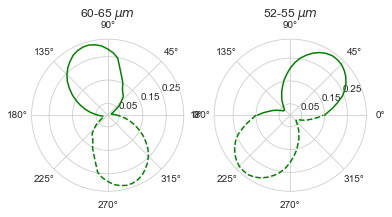

In [11]:
def plot(data1, data2, titles=['Mit Farbfilter', 'Ohne Farbfilter']):
    fig, ax = plt.subplots(1,2, subplot_kw={'polar':True})
    ax[0].plot(data1['alpha[rad]'], data1['U[V]'], 'g-', data1['alpha[rad]']+np.pi, data1['U[V]'], 'g--', label='')
    ax[1].plot(data2['alpha[rad]'], data2['U[V]'], 'g-', data2['alpha[rad]']+np.pi, data2['U[V]'], 'g--')
    ax[0].set_title(titles[0], pad=15)
    ax[1].set_title(titles[1], pad=15)
    ax[0].set_yticks([0.05, 0.15, 0.25])
    ax[1].set_yticks([0.05, 0.15, 0.25])
    return ax

ax = plot(data, data_2, ('60-65 $\mu m$', '52-55 $\mu m$'))
plt.savefig(os.path.join(PLOTS, 'aufg1_elliptisch.png'), dpi=200)

Bestimmung von dn

In [16]:
def dphi(T, L):
    return 2 * np.arctan(np.sqrt(T/L))

def T_L(data):
    return (min(data['U[V]']), max(data['U[V]']))

def dn(l, d, data):
    return l * dphi(*T_L(data)) / (d * 2 * np.pi)

l = 635e-9  # nm

print("60-65: {:.3e}, {:.3e}, 52-55: {:.3e}, {:.3e}".format(*T_L(data), *T_L(data_2)))
print("60-65: {:.3e}, 52-55: {:.3e}".format(dn(l, 60e-6, data), dn(l, 52e-6, data_2)))

60-65: 1.710e-02, 3.100e-01, 52-55: 3.340e-02, 3.186e-01
60-65: 7.771e-04, 52-55: 1.217e-03
